In [1]:
import numpy as np
import tensorflow  as tf
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [10]:
import utils
import get_network
import matplotlib.pyplot as plt

In [3]:
model, sess = get_network.get_model(checkpoint_path='../inception_v4.ckpt')

In [4]:
delta_pl = tf.placeholder(tf.float32, [None, 299, 299, 3])

In [5]:
images = np.load('../data/images.npy')
labels = np.load('../data/labels.npy')

In [6]:
grad_op = utils._grad_across_multi_output(output_tensor=model.logits, input_tensor=model.images_pl, sparse_labels_op=model.labels_pl)
grad_input_op = grad_op * delta_pl

In [40]:
image = images[3]
label = labels[3]

In [41]:
background_reference = np.zeros(image.shape) - 1.0
ig_saliency = utils.get_path_attributions(model, sess, grad_input_op, delta_pl, 
                          image, label, background_reference, num_samples=501,
                          batch_size=32, random_alpha=False, random_sample=False,
                          verbose=True, take_difference=True)
sum_abs_ig = np.abs(np.sum(ig_saliency, axis=-1))

100%|██████████| 16/16 [00:07<00:00,  2.26it/s]


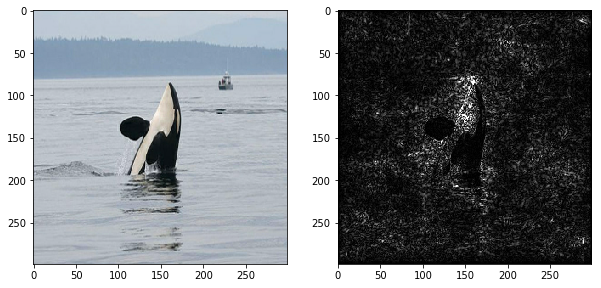

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(utils.normalize(image))
axs[1].imshow(utils.norm_clip(sum_abs_ig), cmap='gray')

In [43]:
sigma = 0.25
num_samples = 501
background_references = np.stack([utils.get_mean_image(image, sigma) for _ in range(num_samples)], axis=0)
sg_saliency  = utils.get_path_attributions(model, sess, grad_input_op, delta_pl, 
                          image, label, background_references, num_samples=501,
                          batch_size=32, random_alpha=True, random_sample=True,
                          verbose=True, take_difference=False)
sum_abs_sg   = np.abs(np.sum(sg_saliency, axis=-1))

100%|██████████| 16/16 [00:07<00:00,  2.35it/s]


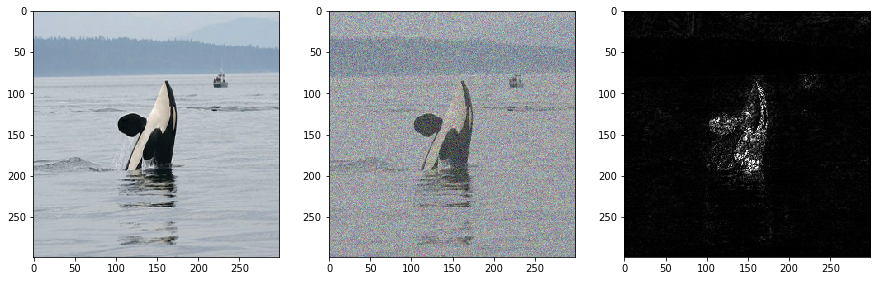

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(utils.normalize(image))
axs[1].imshow(utils.normalize(background_references[0]))
axs[2].imshow(utils.norm_clip(sum_abs_sg), cmap='gray')

In [45]:
sigma = 0.5
num_samples = 501
background_references = np.stack([utils.get_mean_image(image, sigma) for _ in range(num_samples)], axis=0)
sg_saliency  = utils.get_path_attributions(model, sess, grad_input_op, delta_pl, 
                          image, label, background_references, num_samples=501,
                          batch_size=32, random_alpha=True, random_sample=True,
                          verbose=True, take_difference=False)
sum_abs_sg   = np.abs(np.sum(sg_saliency, axis=-1))

100%|██████████| 16/16 [00:07<00:00,  2.34it/s]


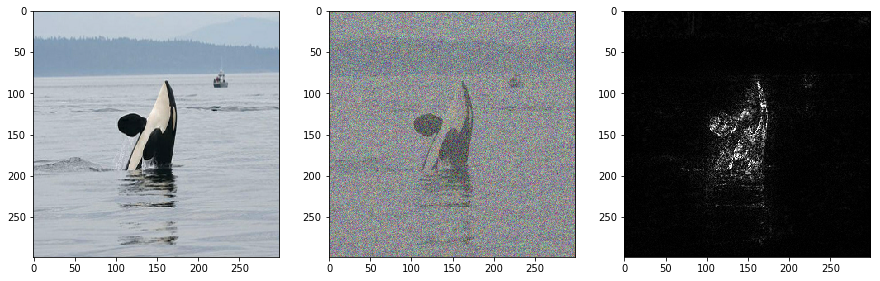

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(utils.normalize(image))
axs[1].imshow(utils.normalize(background_references[0]))
axs[2].imshow(utils.norm_clip(sum_abs_sg), cmap='gray')

In [52]:
sigma = 0.5
num_samples = 501
background_references = np.stack([utils.get_mean_image(image, sigma) for _ in range(num_samples)], axis=0)
sg_saliency  = utils.get_path_attributions(model, sess, grad_input_op, delta_pl, 
                          image, label, background_references, num_samples=501,
                          batch_size=32, random_alpha=True, random_sample=True,
                          verbose=True, take_difference=True)
sum_abs_sg   = np.abs(np.sum(sg_saliency, axis=-1))

100%|██████████| 16/16 [00:07<00:00,  2.43it/s]


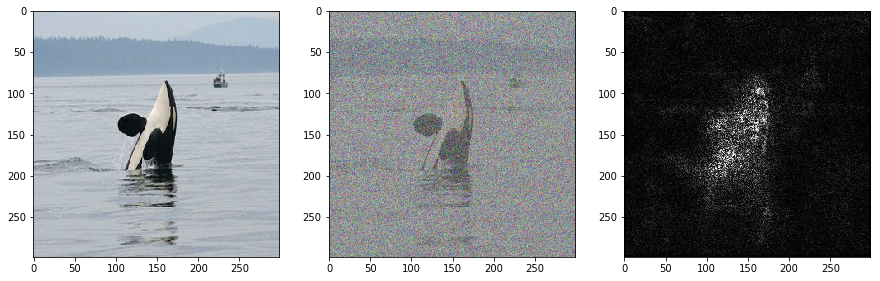

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(utils.normalize(image))
axs[1].imshow(utils.normalize(background_references[0]))
axs[2].imshow(utils.norm_clip(sum_abs_sg), cmap='gray')

In [47]:
reference_images = []
for sample in range(num_samples):
    im_batch = sess.run(model.image_op)
    reference_images.append(im_batch)
reference_images = np.concatenate(reference_images, axis=0)

In [48]:
sigma = 0.5
num_samples = 501
eg_saliency  = utils.get_path_attributions(model, sess, grad_input_op, delta_pl, 
                          image, label, reference_images, num_samples=501,
                          batch_size=32, random_alpha=True, random_sample=True,
                          verbose=True, take_difference=False)
sum_abs_eg   = np.abs(np.sum(eg_saliency, axis=-1))

100%|██████████| 16/16 [00:07<00:00,  2.34it/s]


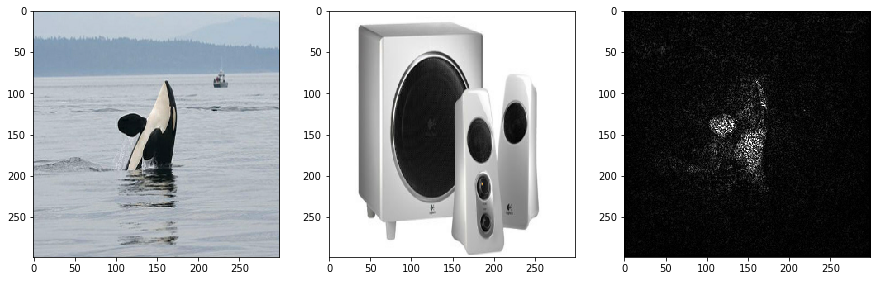

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(utils.normalize(image))
axs[1].imshow(utils.normalize(reference_images[0]))
axs[2].imshow(utils.norm_clip(sum_abs_eg), cmap='gray')